#### 1. Importamos las librerías necesarias

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#### 2. Cargamos el dataset

In [2]:
DATA_PATH = os.path.join("..", "..", 'data', 'raw', 'data_libros.csv')

df_books = pd.read_csv(DATA_PATH)
df_books.columns = ['Horas_de_lectura', 'Libros_leidos']

df_books.head()

,Horas_de_lectura,Libros_leidos
0,0.000000,0.099343
1,0.066890,0.000000
2,0.133779,0.162983
3,0.200669,0.354773
4,0.267559,0.020059


#### 3. Dividir el dataset en parte de entrenamiento y prueba

In [3]:
# Separar las variables predictoras y a predecir
features = df_books['Horas_de_lectura'].values
label = df_books['Libros_leidos'].values

# Divimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = (
    train_test_split(features, label, 
    test_size=0.3, random_state=20)
)

In [4]:
# A los datos de las variables debemos agregarle una columna de 1 el cual sirve como referencia al sesgo
B = np.ones(len(X_train)) # Columna sesgo o BIAS

# Unificar las columnas de sesgo y de features
X = np.array([B, X_train]).T

#### 5. Creación del entrenamiento para Regresión Lineal

In [5]:
def train(features, label):
    """
    Calcula los coeficientes de un modelo de regresión lineal utilizando
    la fórmula directa de OLS:
        B = (X^T @ X)^-1 @ X^T @ Y
        
    -> X = Variables y Bias
    -> Y = Etiqueta
    -> @ = producto punto
    -> ^T = transpuesta de la matriz
    -> ^-1 = inversa de la matriz
    
    Retorna: vector result con los parámetros que mejor optimizan
    el modelo
    """

    result = np.linalg.inv(features.T @ features) @ features.T @ label

    return result

def predictions(x, w, b):
    return b + (w * x)

In [6]:
parameters = train(X, y_train)

points = np.linspace(X_train.min(), X_train.max(), 10)
bias = parameters[0]
weights = parameters[1]

#### 5. Visualización de los datos y los parámetros encontrados

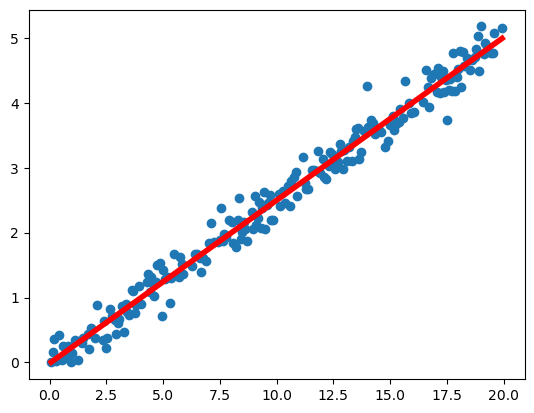

In [7]:
# Graficar los datos
import matplotlib.pyplot as plt

plt.scatter(
    x = X_train.reshape(-1,1),
    y = y_train.reshape(-1,1)
)

# Graficamos los parámetros obtenidos
plt.plot(
    points,
    bias + (weights * points),
    color='red',
    linewidth=4
)

plt.show()

#### 6. Realizando predicciones y evaluando el modelo

In [8]:
# Obtenemos los valores predichos
y_pred = predictions(x=X_test, b=bias, w=weights)

# Creamos una variable de resultados
resultados = {
    'Valor predicho':[], 'Valor original':[], 
    'Error':[], 'L2':[]
}

# Obtemos los resultados de los residuos (error) y la métrica L2
for y_p, y_t in zip(y_pred, y_test):
    resultados['Valor predicho'].append(y_p)
    resultados['Valor original'].append(y_t)
    resultados['Error'].append(y_t-y_p)
    resultados['L2'].append(pow(y_t-y_p, 2))

In [9]:
print(f"Error cuadrático medio: {round(sum(resultados['L2']) / len(y_pred), 2)}")

Error cuadrático medio: 0.04


#### 7. Realizando la gráfica de residuos

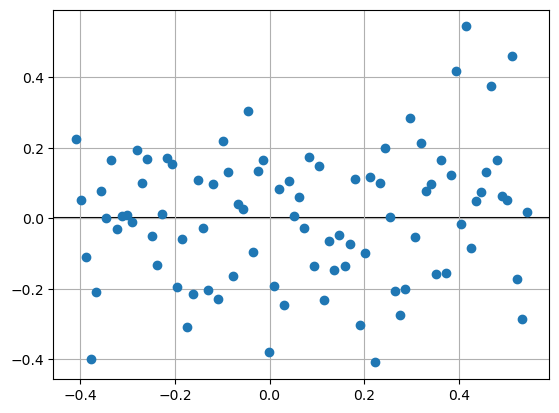

In [10]:
residuos = pd.DataFrame.from_dict(resultados).round(3)

# Gráfica de residuos
rango = np.linspace(
    residuos['Error'].min(), residuos['Error'].max(), len(residuos)
)

plt.scatter(
    x = rango,
    y = residuos['Error'],
    zorder=2
)
plt.axhline(color='black', zorder=1)
plt.grid(zorder=0)
plt.show()